In [31]:
import pandas as pd

#Loading the data 
data = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\Data Science FP\Preprocessing\2021-2024 data.csv")



Cross-Validation R^2 Scores: [0.76115663 0.41059383 0.78092594 0.86528564 0.70309829]
Mean R^2: 0.7042120664683684
Cross-Validation Mean Squared Errors: [0.01142803 0.02005082 0.00981203 0.0069163  0.01356835]
Mean MSE: 0.012355103937499598
Test Mean Squared Error: 0.011428025634785977
Test R-squared: 0.7611566265516998
    Feature  Coefficient
6      G/Sh     0.983220
7     G/SoT     0.132885
9     xG/90     0.101558
8        PK     0.058147
5    SoT/90     0.043168
15  Cluster     0.026430
3     GCA90     0.024688
10  np:G-xG     0.016697
4     Sh/90     0.007452
14   Season     0.001810
2       Age     0.001099
13   Nation     0.000211
1       90s     0.000205
12    Squad    -0.000325
11     Dist    -0.001946
0       Pos    -0.004296


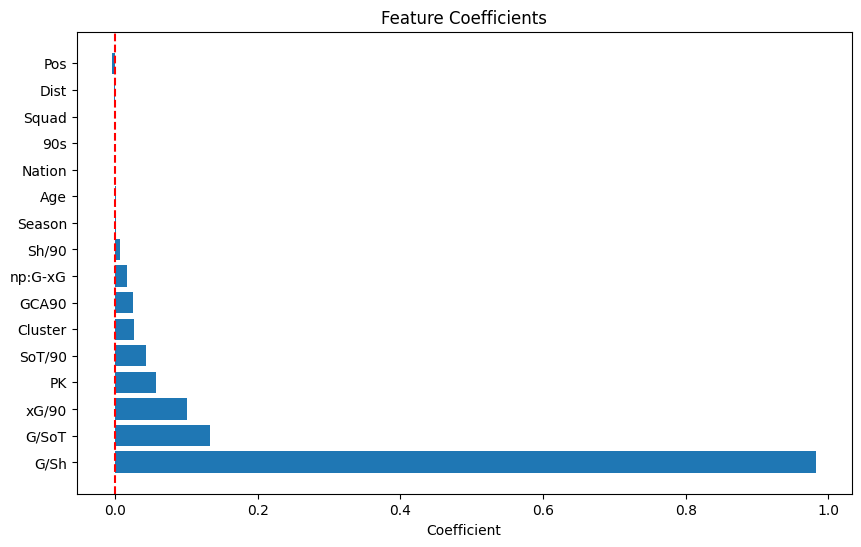

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Selecting the features and target
features = ['Pos','90s','Age','GCA90','Sh/90','SoT/90','G/Sh','G/SoT','PK','xG/90','np:G-xG','Dist','Squad','Nation', 'Season', 'Cluster']
target = 'Gls/90'

# Apply a cap to the target variable to filter out outliers from the dataset
data['Gls/90'] = data['Gls/90'].apply(lambda x: min(x, 1.2))

# Encoding the categorical features
label_encoders = {}
for col in ['Nation', 'Pos', 'Squad', 'Season']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Defining features as X and target as Y
X = data[features]
y = data[target]

# Initialize the linear regression model
model = LinearRegression()

# Doing cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Making  a custom scorer for mse 
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Performing the cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_results = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

print(f"Cross-Validation R^2 Scores: {cv_results}")
print(f"Mean R^2: {np.mean(cv_results)}")
print(f"Cross-Validation Mean Squared Errors: {-mse_results}")  
print(f"Mean MSE: {np.mean(-mse_results)}")

# Making train-test split for comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model on training set
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse}")
print(f"Test R-squared: {r2}")

# Display feature coefficients
coefficients = model.coef_
intercept = model.intercept_

coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

# Plotting feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Coefficients')
plt.axvline(0, color='red', linestyle='--')  
plt.show()


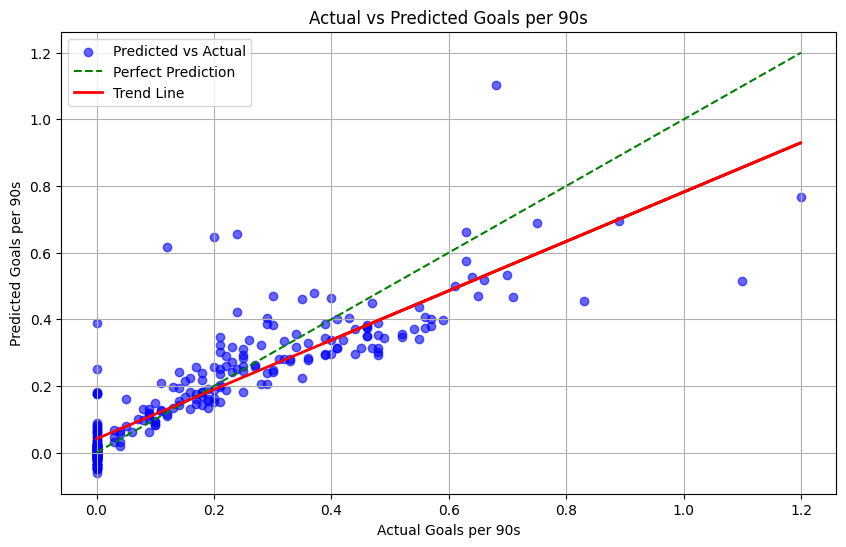

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Making S\scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Perfect Prediction', linestyle='--')

# Fit a trend line using a linear regression
trend_model = LinearRegression()
y_test_reshaped = np.array(y_test).reshape(-1, 1)  
trend_model.fit(y_test_reshaped, y_pred)  
trend_line = trend_model.predict(y_test_reshaped) 

# Add the trend line to the plot
plt.plot(y_test, trend_line, color='red', label='Trend Line', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Actual Goals per 90s')
plt.ylabel('Predicted Goals per 90s')
plt.title('Actual vs Predicted Goals per 90s')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



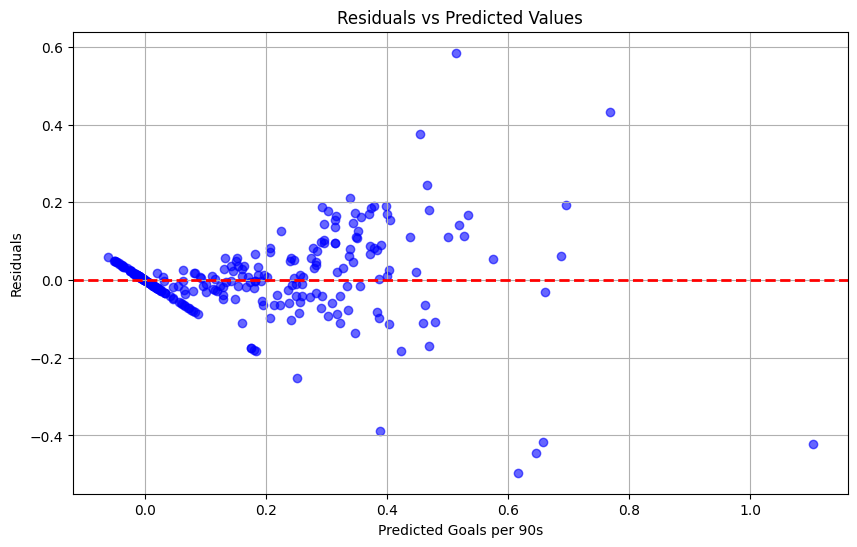

In [34]:
#Plotting residuals
#Formula for calculating the residuals 
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Goals per 90s')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

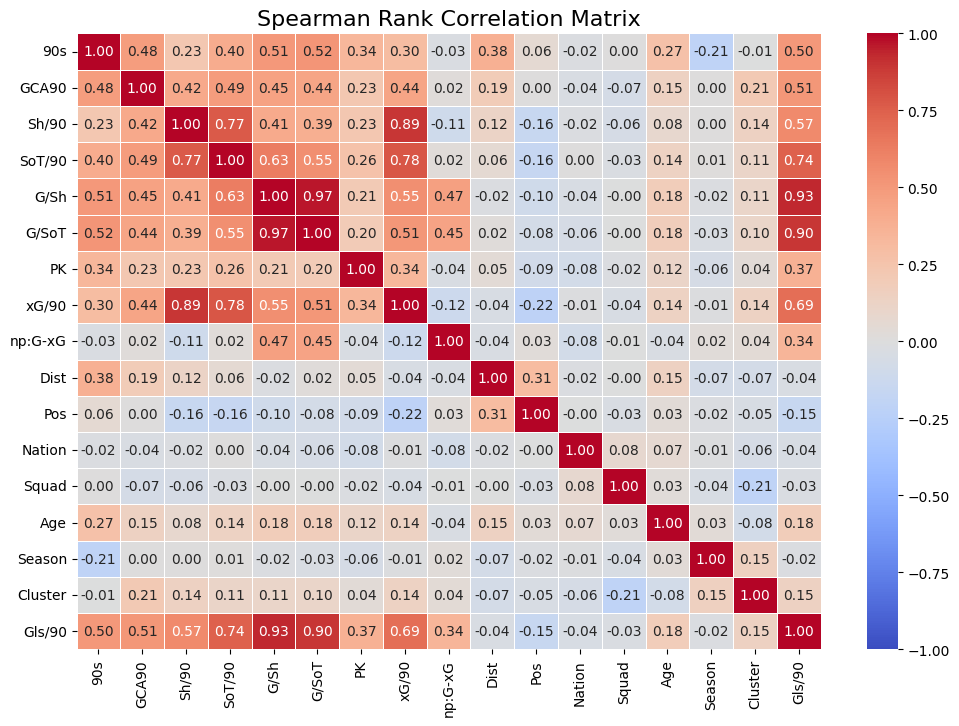

In [35]:
import seaborn as sns
from scipy.stats import spearmanr
#Hypothesis testing 

# Selection features to show in the correlation matrix
features = ['90s', 'GCA90', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'PK', 'xG/90', 'np:G-xG', 'Dist', 'Pos', 'Nation', 'Squad', 'Age', 'Season','Cluster','Gls/90']

# Calculate Spearman rank correlation for the features
spearman_corr, _ = spearmanr(data[features])

# Convert the correlation matrix into a DataFrame for better readability
spearman_corr_df = pd.DataFrame(spearman_corr, index=features, columns=features)

# Create a heatmap of the Spearman correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_df, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, vmin=-1, vmax=1)

# Add title and show the plot
plt.title('Spearman Rank Correlation Matrix', fontsize=16)
plt.show()


In [36]:

features = ['90s', 'GCA90', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'PK', 'xG/90', 'np:G-xG', 'Dist', 'Pos', 'Nation', 'Squad', 'Age', 'Cluster', 'Season']

# Initialize a dictionary to store the Spearman correlation results
spearman_results = {}

# Calculate Spearman's rank correlation for each pair of features
for feature in features:
    correlation, p_value = spearmanr(data[feature], data['Gls/90'])
    spearman_results[feature] = {'Correlation': correlation, 'P-value': p_value}

# Create a DataFrame to display the results
spearman_df = pd.DataFrame(spearman_results).T

# Apply a lambda function to format the values to 5 decimal places
spearman_df = spearman_df.applymap(lambda x: f'{x:.6f}')

# Print the results
print(spearman_df)


        Correlation   P-value
90s        0.501471  0.000000
GCA90      0.514360  0.000000
Sh/90      0.570723  0.000000
SoT/90     0.744499  0.000000
G/Sh       0.932604  0.000000
G/SoT      0.896087  0.000000
PK         0.369665  0.000000
xG/90      0.690844  0.000000
np:G-xG    0.343849  0.000000
Dist      -0.038462  0.157525
Pos       -0.150072  0.000000
Nation    -0.039508  0.146530
Squad     -0.028443  0.295993
Age        0.183777  0.000000
Cluster    0.145530  0.000000
Season    -0.020391  0.453759


C:\Users\samue\AppData\Local\Temp\ipykernel_10168\2077126911.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spearman_df = spearman_df.applymap(lambda x: f'{x:.6f}')


In [37]:
import scipy.stats as stats

# Perform a two-sample t-test to test if there is significant difference between the two clusters 
t_test_result = stats.ttest_ind(data[data['Cluster'] == 0]['Gls/90'],  
                                data[data['Cluster'] == 1]['Gls/90'],
                                equal_var=False)  

print(f"T-test result: {t_test_result}")


T-test result: TtestResult(statistic=-5.895117913885306, pvalue=6.1149083647776125e-09, df=627.7633839121446)


C:\Users\samue\AppData\Local\Temp\ipykernel_10168\255210224.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Cluster', y='Gls/90', data=data, ci='sd')  # Include standard deviation error bars


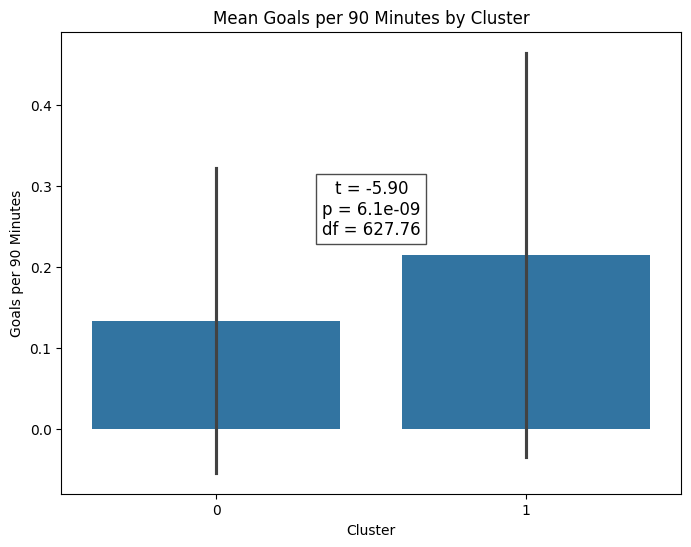

In [38]:
#Creating bar plot to comapre the two clusters 
# Calculate means for each cluster
means = data.groupby('Cluster')['Gls/90'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Gls/90', data=data, ci='sd')  # Include standard deviation error bars
plt.title('Mean Goals per 90 Minutes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Goals per 90 Minutes')

# Annotate with t-test result
plt.text(0.5, max(data['Gls/90']) * 0.2,  # Adjust the position as necessary
         f"t = {t_test_result.statistic:.2f}\n"
         f"p = {t_test_result.pvalue:.1e}\n"
         f"df = {t_test_result.df:.2f}",
         horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.show()
